In [1]:
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

c:\Python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train = X_train/255
X_test = X_test/255

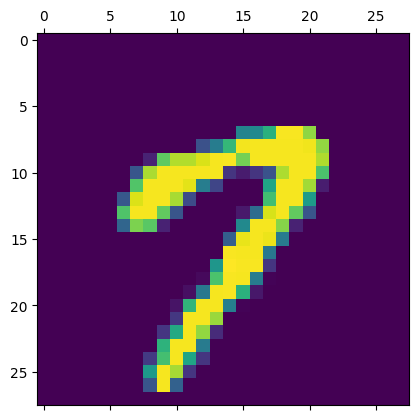

In [4]:
plt.matshow(X_train[15])

In [5]:
# one-hot encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

Base model

In [6]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 5s 2ms/step - loss: 0.3034 - accuracy: 0.9136
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1494 - accuracy: 0.9563
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1099 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0713 - accuracy: 0.9780


In [8]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [9]:
print(accuracy_score(y_test, y_pred == np.max(y_pred, axis=1, keepdims=True)))

0.9699


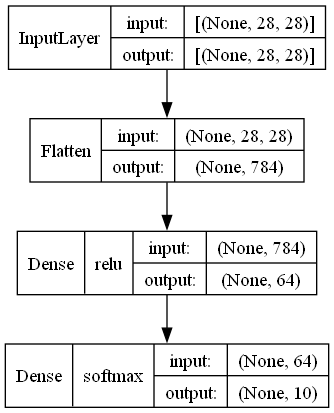

In [10]:
plot_model(model, show_shapes=True, show_layer_names=False, show_layer_activations=True)

Bagging

In [11]:
class Bagging:
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.models = []

    def train(self, X, y):
        for i in tqdm(range(self.n_estimators)):
            rnd_indices = np.random.choice(len(X), size=len(X))
            X_subsample = X[rnd_indices]
            y_subsample = y[rnd_indices]
            base_model = tf.keras.Sequential()
            base_model.add(layers.Flatten(input_shape=(28,28)))
            base_model.add(layers.Dense(64, activation='relu'))
            base_model.add(layers.Dense(10, activation='softmax'))
            base_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

            base_model.fit(X_subsample, y_subsample, batch_size=32, epochs=5, verbose=0)
            self.models.append(base_model)


    def predict(self, X_in):
        predictions = []
        for model in self.models:
            y_pred = model.predict(X_in, verbose=0)
            predictions.append(y_pred)

        return np.mean(np.array(predictions), axis=0)


bagging_clf = Bagging(n_estimators=50)

bagging_clf.train(X_train, y_train)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [14:55<00:00, 17.90s/it]


In [12]:
y_pred_train = bagging_clf.predict(X_train)

In [14]:
print(accuracy_score(y_train, y_pred_train == np.max(y_pred_train, axis=1, keepdims=True)))

0.9897


In [15]:
y_pred = bagging_clf.predict(X_test)

In [16]:
print(accuracy_score(y_test, y_pred == np.max(y_pred, axis=1, keepdims=True)))

0.9793


Advanced Model

In [17]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2, input_shape=(128,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2, input_shape=(128,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2990 - accuracy: 0.9098
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1424 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1104 - accuracy: 0.9663
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0893 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0805 - accuracy: 0.9755


In [19]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
print(accuracy_score(y_test, y_pred == np.max(y_pred, axis=1, keepdims=True)))

0.9761


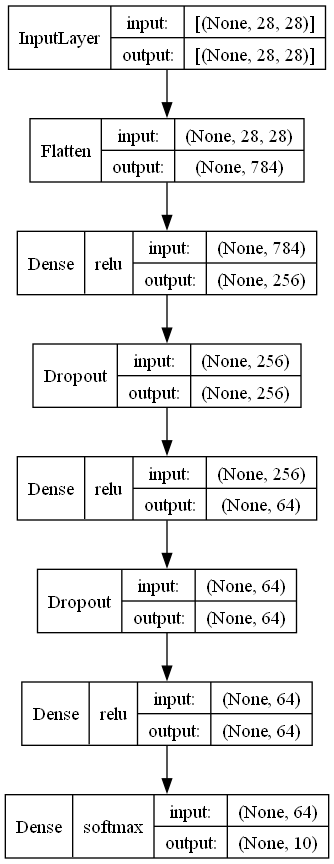

In [21]:
plot_model(model, show_shapes=True, show_layer_names=False, show_layer_activations=True)